# SQL Data Definition Language

## Preparation

For this section you need `chinook.db` database file and working `%sql` magic.  
If you don't have it, please go back to the [previous section](../09_sql/connect_to_database.ipynb) and follow the instructions.  
The following code should not produce any errors:

In [ ]:
%load_ext sql
%sql sqlite:///chinook.db

## `CREATE TABLE` - adding a new empty table to the database

### Overview

The main syntax we need to use for creating a new table:

```sql
CREATE TABLE [IF NOT EXIST] table_name (
    name_1 data_type_1 PRIMARY KEY,      -- first column
    name_2 data_type_2 NOT NULL,         -- second column
    name_3 data_type_3 DEFAULT 0,        /* third column */
    table_constraints                    
)
```

As you can see:
- we must specify the table name. 
- we (can) use `IF NOT EXIST` to create the table only if it doesn't exist. If you try to create a table that already exists inside the database you will get an error message. To avoid this, you can use an optional clause `IF NOT EXISTS`.
- we must specify the list of table columns. Each column must have a `name` and a `data type`.
- we may specify additional column constraints/properties: `PRIMARY KEY`, `FOREIGN KEY`, `UNIQUE`, `NOT NULL`, `CHECK`, `DEFAULT`.

### Constraints

Constraints are the rules enforced on a data columns on table. These are used to limit the type of data that can get added into a table. This ensures the accuracy and reliability of the data in the database.

#### `NOT NULL` - the column must only have valid values

Ensures that a column cannot have NULL value.

If `NOT NULL` constraint is applied on a column then you cannot insert a new row in the table with `NULL` value in that column.

#### `PRIMARY KEY` - defines primary key column(s)

The `PRIMARY KEY` constraint identifies that the column belongs to the set of primary key columns which uniquely identify each row of the table. No two rows in a table are allowed to have exactly the same values in all of its primary key columns. We cannot enter `NULL` value in a primary key column.

Primary key(s) might be defined in two ways:

- If the primary key has only one column:

```sql
`CREATE TABLE table_name(
   column_1 INTEGER NOT NULL PRIMARY KEY,
   ...
)
```

- If the primary key consists of two or more columns:

```sql
CREATE TABLE table_name(
   column_1 INTEGER NOT NULL,
   column_2 INTEGER NOT NULL,
   ...
   PRIMARY KEY(column_1,column_2,...)
)
```

#### `FOREIGN KEY` - defines a relation to (other) table

`FOREIGN KEY` is used to describe that the current table stores a relation to a parent table and arguments specify:
- the name of the referenced (parent) table after `REFERENCES`
- what *action* should be taken `ON UPDATE` of a referenced row in the parent table (so, when the value is changed)
- what *action* should be taken `ON DELETE` of a referenced row in the parent table (so, when the row gets removed)

The SQL specification follows the pattern:

```sql
FOREIGN KEY (foreign_key_columns)
   REFERENCES parent_table(parent_key_columns)
      ON UPDATE action 
      ON DELETE action
```

The following actions are allowed (more desciption [here](https://www.sqlitetutorial.net/sqlite-foreign-key/)):

- `NO ACTION`: No action is taken on update/delete.
- `CASCADE`: Propagates the changes from the parent table to the child table when you update or delete the parent key.
- `SET NULL`
- `SET DEFAULT`
- `RESTRICT`

#### `UNIQUE` - this column must have no duplicated values

Ensures that all values in a column are different. The `UNIQUE` constraint restricts one or more columns to contain unique values within a table.

Although both a `UNIQUE` constraint and a `PRIMARY KEY` constraint enforce uniqueness, use a `UNIQUE` constraint instead of a `PRIMARY KEY` constraint when you want to enforce the uniqueness of a column, or combination of columns, that is not the primary key.

#### `CHECK` - constraints checks in form of expressions

The `CHECK` constraint is used to restrict the values that can be placed in a column. It allows to write expressions which must be met before a value is allowed to be inserted/changed.

#### `DEFAULT` - value to be used when not provided

`DEFAULT` specifies the default value for the columns. A column default is some value that will be inserted in the column by the database engine when an `INSERT` statement doesn't explicitly assign a particular value.

## `DROP TABLE` - removing a table from the database

Use the following syntax to remove a table from the database:

```sql
DROP TABLE table_name
```

*Note:* Dropping of a table might fail when presence of table rows are necessary due to constraints present in other tables.

---

## Example 1: Create two tables with many-to-many relation

Suppose you have to manage contacts in an SQL database.

Each contact has the following information:

- First name
- Last name
- Email
- Phone

The requirement is that the email and phone must be unique. In addition, each contact belongs to one or many groups, and each group can have zero or many contacts.

Based on these requirements, we came up with three tables:

- The `contacts` table that stores contact information.
- The `groups` table that stores group information.
- The `contact_groups` table that stores the relationship between contacts and groups.

The following database diagram illustrates tables:`contacts` `groups`, and `contact_groups`.

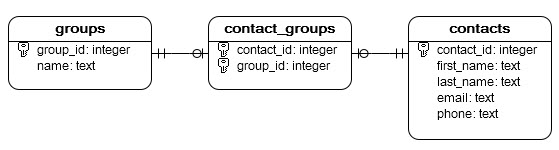

*Note:* We need to know what are the constraints before creating tables.

### The following statement creates the `contacts` table

```sql
CREATE TABLE IF NOT EXISTS contacts (
    contact_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT NOT NULL UNIQUE,
    phone TEXT NOT NULL UNIQUE
)
```

### The following statement creates the `groups`table

```sql
CREATE TABLE IF NOT EXISTS groups (
   group_id INTEGER PRIMARY KEY,
   name TEXT NOT NULL
)
```

### The following statement creates `contact_groups` table

```sql
CREATE TABLE IF NOT EXISTS contact_groups(
   contact_id INTEGER,
   group_id INTEGER,
   PRIMARY KEY (contact_id, group_id),
   FOREIGN KEY (contact_id) 
      REFERENCES contacts (contact_id) 
         ON DELETE CASCADE 
         ON UPDATE NO ACTION,
   FOREIGN KEY (group_id) 
      REFERENCES groups (group_id) 
         ON DELETE CASCADE 
         ON UPDATE NO ACTION
)
```

## Example 2: Create two tables and drop

For the demonstration purpose, we will create two related tables: `people` and `addresses`:
- Each person has zero or one address. 
- And an address can be shared by any number of people.

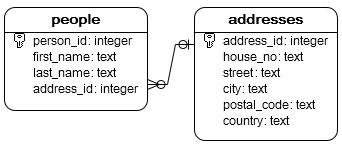

### Create tables

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS people (
   person_id INTEGER PRIMARY KEY,
   first_name TEXT,
   last_name TEXT,
   address_id INTEGER,
   FOREIGN KEY (address_id) 
      REFERENCES addresses (address_id)
)

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS addresses (
   address_id INTEGER PRIMARY KEY,
   house_no TEXT,
   street TEXT,
   city TEXT,
   postal_code TEXT,
   country TEXT
)

### Insert example data

Let's insert an address and a person into the addresses and people tables.

In [ ]:
%%sql
INSERT INTO addresses ( house_no, street, city, postal_code, country ) 
  VALUES ( '3960', 'North 1st Street', 'San Jose', '95134', 'USA' ); 
INSERT INTO people ( first_name, last_name, address_id ) 
  VALUES ('John', 'Doe', 1);
INSERT INTO people ( first_name, last_name) 
  VALUES ('Tonny', 'Homeless');

### Show inserted data

In [ ]:
%sql SELECT * FROM addresses

In [ ]:
%sql SELECT * FROM people

### Drop table

Try to use the `DROP TABLE` statement to remove the `addresses` table.

In [ ]:
%%sql
DROP TABLE IF EXISTS addresses